In [74]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# import data
df_nyc_property = pd.read_csv("dataset/nyc-rolling-sales.csv")

In [75]:
df_nyc_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [76]:
df_nyc_property.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [77]:
# drop unnamed column
df_nyc_property = df_nyc_property.drop(
    columns=["Unnamed: 0", "EASE-MENT"], errors="ignore")
df_nyc_property.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [78]:
# Convert to datetime
df_nyc_property["SALE DATE"] = pd.to_datetime(
    df_nyc_property["SALE DATE"], errors="coerce")
df_nyc_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  object        
 2   BUILDING CLASS CATEGORY         84548 non-null  object        
 3   TAX CLASS AT PRESENT            84548 non-null  object        
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  object        
 7   ADDRESS                         84548 non-null  object        
 8   APARTMENT NUMBER                84548 non-null  object        
 9   ZIP CODE                        84548 non-null  int64         
 10  RESIDENTIAL UNITS               84548 non-null  int64         
 11  CO

In [79]:
# Convert numeric-looking object columns
num_cols = ["LAND SQUARE FEET", "GROSS SQUARE FEET", "SALE PRICE"]

for col in num_cols:
    df_nyc_property[col] = (
        df_nyc_property[col]
        .astype(str)                           # ensure string for .str methods
        .str.replace(",", "", regex=False)     # remove commas
        .str.strip()                           # remove whitespace
    )
    # Convert to numeric, coerce errors to NaN
    df_nyc_property[col] = pd.to_numeric(df_nyc_property[col], errors="coerce")

# Check conversion
print(df_nyc_property[num_cols].dtypes)
print(df_nyc_property[num_cols].head(10))

LAND SQUARE FEET     float64
GROSS SQUARE FEET    float64
SALE PRICE           float64
dtype: object
   LAND SQUARE FEET  GROSS SQUARE FEET  SALE PRICE
0            1633.0             6440.0   6625000.0
1            4616.0            18690.0         NaN
2            2212.0             7803.0         NaN
3            2272.0             6794.0   3936272.0
4            2369.0             4615.0   8000000.0
5            2581.0             9730.0         NaN
6            1750.0             4226.0   3192840.0
7            5163.0            21007.0         NaN
8            1534.0             9198.0         NaN
9            4489.0            18523.0  16232000.0


In [80]:
df_nyc_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  object        
 2   BUILDING CLASS CATEGORY         84548 non-null  object        
 3   TAX CLASS AT PRESENT            84548 non-null  object        
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  object        
 7   ADDRESS                         84548 non-null  object        
 8   APARTMENT NUMBER                84548 non-null  object        
 9   ZIP CODE                        84548 non-null  int64         
 10  RESIDENTIAL UNITS               84548 non-null  int64         
 11  CO

In [81]:
df_nyc_property.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [82]:
import pandas as pd

# Select the numeric columns of interest
cols_to_check = ["SALE PRICE", "GROSS SQUARE FEET", "LAND SQUARE FEET"]

for col in cols_to_check:
    print(f"\n--- {col} ---")
    print(f"Non-null count: {df_nyc_property[col].notnull().sum()}")
    print(f"Null count: {df_nyc_property[col].isnull().sum()}")
    print(f"Zero count: {(df_nyc_property[col] == 0).sum()}")


--- SALE PRICE ---
Non-null count: 69987
Null count: 14561
Zero count: 10228

--- GROSS SQUARE FEET ---
Non-null count: 56936
Null count: 27612
Zero count: 11417

--- LAND SQUARE FEET ---
Non-null count: 58296
Null count: 26252
Zero count: 10326


In [83]:
cols_to_check = ["SALE PRICE", "GROSS SQUARE FEET", "LAND SQUARE FEET"]

# Drop rows where any of the important columns are null or zero
df_nyc_property_clean = df_nyc_property[
    (df_nyc_property[cols_to_check].notnull().all(axis=1)) &  # remove nulls
    (df_nyc_property[cols_to_check] != 0).all(axis=1)         # remove zeros
].copy()

# Check result
print("Before:", df_nyc_property.shape)
print("After :", df_nyc_property_clean.shape)

Before: (84548, 20)
After : (29329, 20)


In [84]:
#check cleaned columns
cols_to_check = ["SALE PRICE", "GROSS SQUARE FEET", "LAND SQUARE FEET"]

for col in cols_to_check:
    print(f"\n--- {col} ---")
    print(f"Non-null count: {df_nyc_property_clean[col].notnull().sum()}")
    print(f"Null count: {df_nyc_property_clean[col].isnull().sum()}")
    print(f"Zero count: {(df_nyc_property_clean[col] == 0).sum()}")


--- SALE PRICE ---
Non-null count: 29329
Null count: 0
Zero count: 0

--- GROSS SQUARE FEET ---
Non-null count: 29329
Null count: 0
Zero count: 0

--- LAND SQUARE FEET ---
Non-null count: 29329
Null count: 0
Zero count: 0


In [85]:
#final check on the final data
df_nyc_property_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29329 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         29329 non-null  int64         
 1   NEIGHBORHOOD                    29329 non-null  object        
 2   BUILDING CLASS CATEGORY         29329 non-null  object        
 3   TAX CLASS AT PRESENT            29329 non-null  object        
 4   BLOCK                           29329 non-null  int64         
 5   LOT                             29329 non-null  int64         
 6   BUILDING CLASS AT PRESENT       29329 non-null  object        
 7   ADDRESS                         29329 non-null  object        
 8   APARTMENT NUMBER                29329 non-null  object        
 9   ZIP CODE                        29329 non-null  int64         
 10  RESIDENTIAL UNITS               29329 non-null  int64         
 11  COMMERC

the data is cleaned and ready to be used

In [86]:
df_nyc_property.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [87]:
# Create list to hold categories
year_built_category = []

# Loop through each value in YEAR BUILT
for year in df_nyc_property_clean["YEAR BUILT"]:
    if year < 2001:
        year_built_category.append("< Year 2001")
    else:
        year_built_category.append(">= Year 2001")

# Assign list to new column
df_nyc_property_clean["YEAR BUILT CATEGORY"] = year_built_category

# Preview
df_nyc_property_clean.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,YEAR BUILT CATEGORY
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,< Year 2001
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,< Year 2001
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,< Year 2001
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,...,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,< Year 2001
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,...,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07,< Year 2001
11,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2B,400,21,D1,530-532 EAST 5TH STREET,,10009,...,0,10,3717.0,12350.0,2009,2,D1,10350000.0,2016-10-17,>= Year 2001
22,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,376,14,C6,244 EAST 7TH STREET,,10009,...,0,24,4131.0,16776.0,1928,2,C6,11900000.0,2017-06-21,< Year 2001
172,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391,19,S3,624 EAST 9TH STREET,,10009,...,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,< Year 2001
173,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,393,4,S4,165 AVENUE B,,10009,...,1,5,2201.0,5608.0,1900,2,S4,7215000.0,2017-01-30,< Year 2001
174,1,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,394,5,S5,183 AVENUE B,,10009,...,1,6,1779.0,3713.0,1910,2,S5,4750000.0,2017-04-03,< Year 2001


## Two Sample Testing

This is to test if there is any difference between two data sets

Question to answer: Is there a difference in property prices between those built before 2001 and those built after?

H0: u1 = u2

H1: u1 != u2

In [88]:
df_nyc_property_clean_pre2001 = df_nyc_property_clean[df_nyc_property_clean['YEAR BUILT CATEGORY'] == '< Year 2001']
df_nyc_property_clean_post2001 = df_nyc_property_clean[df_nyc_property_clean['YEAR BUILT CATEGORY'] == '>= Year 2001']

nyc_property_clean_pre2001_price = df_nyc_property_clean_pre2001['SALE PRICE']
nyc_property_clean_post2001_price = df_nyc_property_clean_post2001['SALE PRICE']

In [89]:
# n mean std
npre2001 = nyc_property_clean_pre2001_price.count()
meanpre2001 = nyc_property_clean_pre2001_price.mean()
stdpre2001 = nyc_property_clean_pre2001_price.std()
print("Pre 2001:", npre2001, meanpre2001, stdpre2001)

npost2001 = nyc_property_clean_post2001_price.count()
meanpost2001 = nyc_property_clean_post2001_price.mean()
stdpost2001 = nyc_property_clean_post2001_price.std()
print("Post 2001:", npost2001, meanpost2001, stdpost2001)

Pre 2001: 27122 1630570.011134872 17453220.69301282
Post 2001: 2207 1744947.7449025826 9750099.044461561


In [90]:
stats.ttest_ind(nyc_property_clean_pre2001_price, nyc_property_clean_post2001_price, equal_var=False)

TtestResult(statistic=np.float64(-0.490817719464345), pvalue=np.float64(0.6235862609884775), df=np.float64(3487.0970733736785))

Statistical Inference Conclusion:

p-value ≈ 0.624 → much higher than the common threshold (0.05).

This means we fail to reject the null hypothesis.

Is there a difference in property prices between those built before 2001 and those built after? Although there may be small differences in the mean prices, statistically they are not meaningful — property prices are not significantly different between pre-2001 and post-2001 buildings in your cleaned dataset.

## ANOVA
Comparing three or more groups of data, 
for example, the scores of students in groups A, B, C, D, E.
    
In this case, we are going to use ANOVA test to answer: Is there any difference in Total Units sold depending on the tax class category?


In [91]:
# See all unique tax categories
tax_categories = df_nyc_property_clean["TAX CLASS AT PRESENT"].unique()
print("Number of unique tax categories:", len(categories))
print("\nSample of tax categories:")
for cat in tax_categories[:6]:  # print first 20 to preview
    print("-", cat)

Number of unique tax categories: 6

Sample of tax categories:
- 2A
- 2B
- 2
- 4
- 1
- 2C


In [92]:
df_nyc_property_clean_tax_2A = df_nyc_property_clean[df_nyc_property_clean['TAX CLASS AT PRESENT'] == '2A']
df_nyc_property_clean_tax_2B = df_nyc_property_clean[df_nyc_property_clean['TAX CLASS AT PRESENT'] == '2B']
df_nyc_property_clean_tax_2 = df_nyc_property_clean[df_nyc_property_clean['TAX CLASS AT PRESENT'] == '2']
df_nyc_property_clean_tax_4 = df_nyc_property_clean[df_nyc_property_clean['TAX CLASS AT PRESENT'] == '4']
df_nyc_property_clean_tax_1 = df_nyc_property_clean[df_nyc_property_clean['TAX CLASS AT PRESENT'] == '1']
df_nyc_property_clean_tax_2C = df_nyc_property_clean[df_nyc_property_clean['TAX CLASS AT PRESENT'] == '2C']


nyc_property_clean_tax_2A_units = df_nyc_property_clean_tax_2A['TOTAL UNITS']
nyc_property_clean_tax_2B_units = df_nyc_property_clean_tax_2B['TOTAL UNITS']
nyc_property_clean_tax_2_units = df_nyc_property_clean_tax_2['TOTAL UNITS']
nyc_property_clean_tax_4_units = df_nyc_property_clean_tax_4['TOTAL UNITS']
nyc_property_clean_tax_1_units = df_nyc_property_clean_tax_1['TOTAL UNITS']
nyc_property_clean_tax_2C_units = df_nyc_property_clean_tax_2C['TOTAL UNITS']



In [93]:
# n mean std
# Tax 2A
n2A = nyc_property_clean_tax_2A_units.count()
mean2A = nyc_property_clean_tax_2A_units.mean()
std2A = nyc_property_clean_tax_2A_units.std()
print("Tax 2A:", n2A, mean2A, std2A)

# Tax 2B
n2B = nyc_property_clean_tax_2B_units.count()
mean2B = nyc_property_clean_tax_2B_units.mean()
std2B = nyc_property_clean_tax_2B_units.std()
print("Tax 2B:", n2B, mean2B, std2B)

# Tax 2
n2 = nyc_property_clean_tax_2_units.count()
mean2 = nyc_property_clean_tax_2_units.mean()
std2 = nyc_property_clean_tax_2_units.std()
print("Tax 2:", n2, mean2, std2)

# Tax 4
n4 = nyc_property_clean_tax_4_units.count()
mean4 = nyc_property_clean_tax_4_units.mean()
std4 = nyc_property_clean_tax_4_units.std()
print("Tax 4:", n4, mean4, std4)

# Tax 1
n1 = nyc_property_clean_tax_1_units.count()
mean1 = nyc_property_clean_tax_1_units.mean()
std1 = nyc_property_clean_tax_1_units.std()
print("Tax 1:", n1, mean1, std1)

# Tax 2C
n2C = nyc_property_clean_tax_2C_units.count()
mean2C = nyc_property_clean_tax_2C_units.mean()
std2C = nyc_property_clean_tax_2C_units.std()
print("Tax 2C:", n2C, mean2C, std2C)

Tax 2A: 1291 4.729666924864446 0.8860039007988453
Tax 2B: 412 8.446601941747574 1.0646101404456814
Tax 2: 691 56.196816208393635 117.20749118485888
Tax 4: 1471 6.5186947654656695 64.87607881684106
Tax 1: 25463 1.6124180183010643 0.6797205360822215
Tax 2C: 1 10.0 nan


In [94]:
stats.f_oneway(nyc_property_clean_tax_2A_units, nyc_property_clean_tax_2B_units, nyc_property_clean_tax_2_units, nyc_property_clean_tax_4_units, nyc_property_clean_tax_1_units, nyc_property_clean_tax_2C_units)

F_onewayResult(statistic=np.float64(761.0279968827933), pvalue=np.float64(0.0))

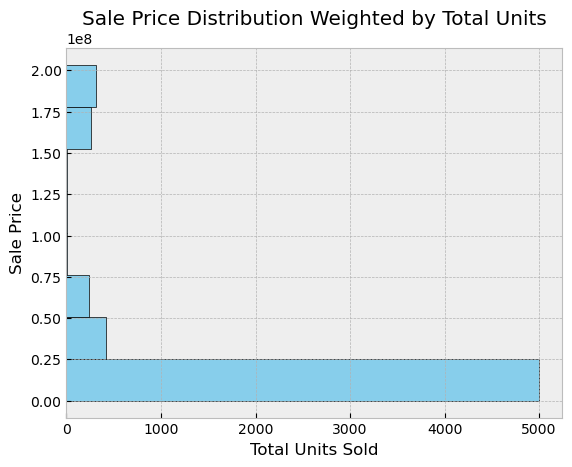

Data does NOT seem normally distributed (p = 0.0000)


In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import shapiro

# Filter for post-2001 properties
df_post2001 = df_nyc_property_clean[df_nyc_property_clean['YEAR BUILT CATEGORY'] == '>= Year 2001']

# Columns
price = df_post2001['SALE PRICE']
weights = df_post2001['TOTAL UNITS']  # Use total units as weight

# Number of bins
num_bins = 8

plt.style.use('bmh')

# Compute weighted histogram
freq, bin_edges = np.histogram(price, bins=num_bins, weights=weights)

# Horizontal histogram
plt.barh(
    y=(bin_edges[:-1] + bin_edges[1:]) / 2,  # use midpoints for better visualization
    width=freq,
    height=np.diff(bin_edges),
    edgecolor='black',
    color='skyblue'
)

plt.ylabel('Sale Price')
plt.xlabel('Total Units Sold')
plt.title('Sale Price Distribution Weighted by Total Units')
plt.show()

# Check for normality using Shapiro-Wilk test
stat, p_value = shapiro(price)
if p_value > 0.05:
    print(f'Data seems normally distributed (p = {p_value:.4f})')
else:
    print(f'Data does NOT seem normally distributed (p = {p_value:.4f})')

Analysis Result and Conclusion

p-value = 0.0 → far below 0.05, meaning the differences are statistically significant.
There is a significant difference in Total Units sold depending on the tax class category. In other words, to simply answer this question: Is there any difference in Total Units sold depending on the tax class category?
Yes, the average number of units varies meaningfully across the different tax classes.

Normality Check using Shapiro-Wilk test on SALE PRICE:
If p > 0.05 → distribution is approximately normal.
If p ≤ 0.05 → distribution is not normal.

Given typical real estate data, sale prices are often skewed (long right tail) and usually not normally distributed.